# Ensemble learning

### BAGGING - Random forest Classifier

In [10]:
# créate random dataset using Hastie method from scikit-learn
from sklearn.datasets import make_hastie_10_2

X, y = make_hastie_10_2(n_samples=12000, random_state=808)

# défin the nuber or trees (estimators) to check for accuracy of RandomForestClassifier
trees_count = [1,2,3,4,5,10,15,20,25,30,40,50,60,70,80,90,100,110,120]

# train the model and identify the most accurate # of estimators we will neer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=8)

accuracy = []
for n_estimator in trees_count:
    clf = RandomForestClassifier(
        n_estimators = n_estimator,
        max_depth = 2, # profondeur de chaque arbre
        random_state = 8
    )
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test, y_test))

Text(0.5, 1.0, 'Accuracy on test vs n_estimators')

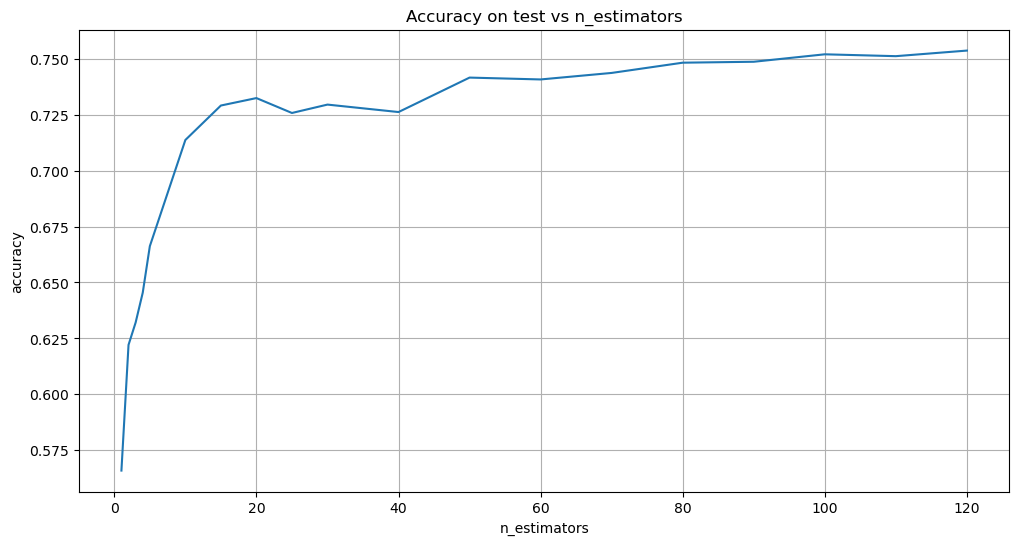

In [26]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,6))
plt.plot(trees_count, accuracy)
plt.grid()
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.title("Accuracy on test vs n_estimators")

### Estimez l’importance de chaque variable
Comme chaque arbre n'est pas entraîné sur toutes les variables, il est possible d'estimer l'importance de chaque variable.

In [55]:
import pandas as pd
import numpy as np

filename = 'https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-numerical-2023-09-10.csv'
data = pd.read_csv(filename)

X = data[['domanialite', 'arrondissement','libelle_francais', 'genre', 'espece','circonference_cm', 'hauteur_m']]
y = data.stade_de_developpement.values

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8, random_state=808)

clf = RandomForestClassifier(
    n_estimators = 100,
    random_state = 8
    )

clf.fit(X_train, y_train)

print("test :",np.round(clf.score(X_test, y_test), 3))
print('train:', np.round(clf.score(X_train, y_train), 3))

test : 0.832
train: 0.935


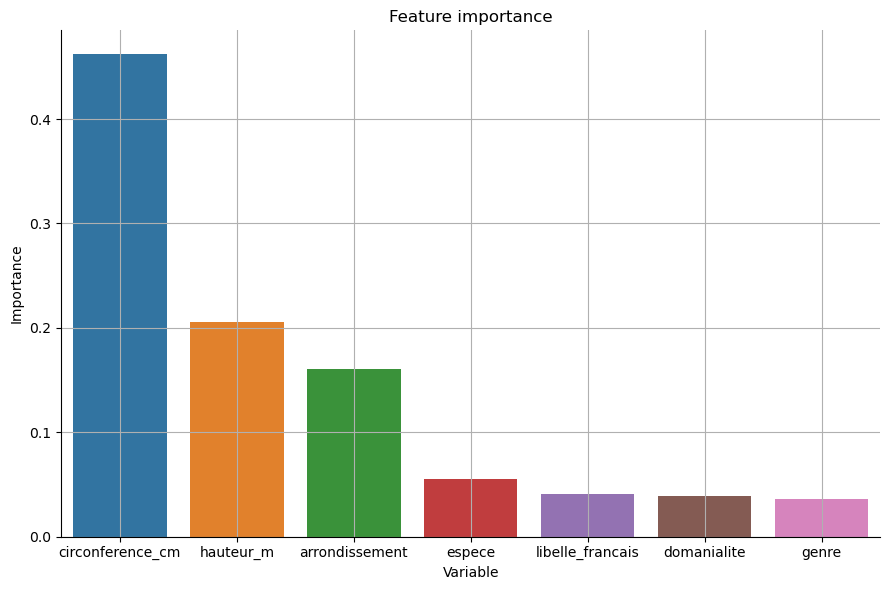

In [57]:
import seaborn as sns
df = pd.DataFrame()
df['feature'] = X.columns
df['importance'] = clf.feature_importances_
df.sort_values(by = 'importance', ascending = False, inplace = True)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)

sns.barplot(data = df, x='feature', y='importance')
ax.set_title('Feature importance')
ax.set_xlabel('Variable')
ax.set_ylabel('Importance')
ax.grid(True, which = 'both')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

### BOOSTING - Gradient Boosting Classifier

Le modèle de forêt aléatoire est intrinsèquement parallèle. Les arbres sont entraînés en même temps sur des parties du dataset.

Le boosting, lui, enchaîne l'entraînement des prédicteurs fiables de façon séquentielle, en se concentrant à chaque itération sur les échantillons qui ont généré le plus d'erreurs.

Appliqué aux arbres de décision, le boosting donne naissance à XGBoost qui veut dire Extrême Gradient Boosting. C'est la progéniture d'une forêt aléatoire avec un gradient stochastique.

N.B.  le  learning_rate  ou taux d'apprentissage qui dicte la quantité de corrections prises en compte à chaque itération.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

NameError: name 'log_loss' is not defined

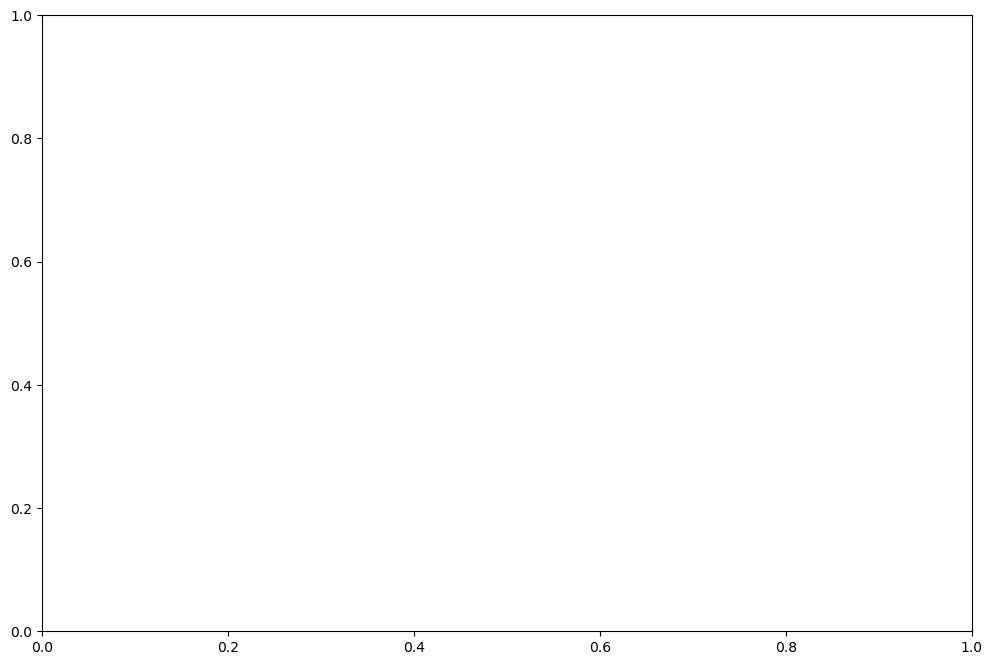

In [64]:
# reprenons l'exemple de Hastie avec optimisation des arbres faite précedement où n_estimators = 50
# N.N. Plus un modèle a des variables, plus celle-ci doivent être optimisées (ex. chois des arbres dans RandomForestClassifier) plus il devient compléxe

# créate random dataset using Hastie method from scikit-learn
from sklearn.datasets import make_hastie_10_2

X, y = make_hastie_10_2(n_samples=12000, random_state=808)

from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [1, 0.6,  0.3, 0.1]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

for lr in learning_rates:

    clf = GradientBoostingClassifier(
                    n_estimators= 500,
                    max_depth= 2,
                    random_state= 8,
                    learning_rate= lr
    )
    clf.fit(X_train, y_train)

    scores = np.zeros((clf.n_estimators,), dtype=np.float64)
    print(scores)
    for i, y_proba in enumerate(clf.staged_predict_proba(X_test)):
        scores[i] =  log_loss(y_test, y_proba[:, 1])

    ax.plot(
        (np.arange(scores.shape[0]) + 1),
        scores,
        "-",
        label=f"alpha: {lr}",
    )

ax.grid(True, which = 'both')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("Itérations")
ax.set_ylabel("Log Loss (test)")
ax.set_title("Influence du learning rate sur la performance du GradientBoosting")
ax.legend()
plt.tight_layout()